In [1]:
import pandas as pd
import os
from pathlib import Path
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from plotnine import *
import sys
from patsy import dmatrices
from mizani.formatters import percent_format
from scipy.stats import logistic
from scipy.stats import norm

In [2]:
path = Path(os.getcwd())

In [3]:
base_dir = path.parent.parent

In [4]:
data_in = os.path.join(str(base_dir) , "da_data_repo/share-health/clean/")
data_out = os.path.join(str(base_dir), "da_case_studies/ch11-smoking-health-risk/")
output = os.path.join(str(base_dir), "da_case_studies/ch12-stock-returns-risk/output/")
func = os.path.join(str(base_dir) ,   "da_case_studies/ch00-tech-prep/")

In [5]:
share = pd.read_csv(os.path.join(data_in,"share-health.csv"))

In [6]:
sys.path.append(func)

In [7]:
from py_helper_functions import *

In [8]:
#Part I

In [9]:
share.head()

,mergeid,wave,country,country_mod,int_year,int_month,female,age,eduyears_mod,sphus,br015,smoking,ever_smoked,income_pct_w4,bmi,mar_stat
0,AT-000327-01,1,11,40,2004,6,0,51.900002,-15.0,1,2,5,5,-13,32.787994,1
1,AT-000327-01,2,11,40,2007,3,0,54.700001,-3.0,5,4,5,5,-13,20.281233,1
2,AT-000327-02,1,11,40,2004,6,1,48.900002,3.0,1,3,5,5,-13,31.161373,1
3,AT-000327-02,2,11,40,2007,3,1,51.700001,3.0,2,1,5,5,-13,30.461119,1
4,AT-000674-01,4,11,40,2011,11,1,59.700001,3.0,3,1,5,5,1,24.023809,6


In [10]:
share['healthy']=0
share.loc[(share['sphus']==1) | (share['sphus']==2),'healthy']=1
share.loc[~((share['sphus']>0) & (share['sphus']<=5)),'healthy']=np.nan

In [11]:
share['healthy'].value_counts()

0.0    213847
1.0     73808
Name: healthy, dtype: int64

In [12]:
share = share.dropna(how='any')

In [13]:
share['baseline'] = 0
share.loc[share['wave']==4,'baseline']=1
share['endline'] = 0
share.loc[share['wave']==6,'endline']=1

In [14]:
share['baseline'].value_counts()

0    229773
1     57882
Name: baseline, dtype: int64

In [15]:
share['endline'].value_counts()

0    219568
1     68087
Name: endline, dtype: int64

In [16]:
share['temp'] = np.where(share['endline']==1,np.where(share['healthy']==1,1,0),np.nan)

In [17]:
share['temp'].value_counts()

0.0    51241
1.0    16846
Name: temp, dtype: int64

In [18]:
len(share)

287655

In [19]:
share.head()

,mergeid,wave,country,country_mod,int_year,int_month,female,age,eduyears_mod,sphus,br015,smoking,ever_smoked,income_pct_w4,bmi,mar_stat,healthy,baseline,endline,temp
0,AT-000327-01,1,11,40,2004,6,0,51.900002,-15.0,1,2,5,5,-13,32.787994,1,1.0,0,0,NaN
1,AT-000327-01,2,11,40,2007,3,0,54.700001,-3.0,5,4,5,5,-13,20.281233,1,0.0,0,0,NaN
2,AT-000327-02,1,11,40,2004,6,1,48.900002,3.0,1,3,5,5,-13,31.161373,1,1.0,0,0,NaN
3,AT-000327-02,2,11,40,2007,3,1,51.700001,3.0,2,1,5,5,-13,30.461119,1,1.0,0,0,NaN
4,AT-000674-01,4,11,40,2011,11,1,59.700001,3.0,3,1,5,5,1,24.023809,6,0.0,1,0,NaN


In [20]:
len(share)

287655

In [21]:
len(share['mergeid'].unique())

120147

In [22]:
#df['ratio'] = df.groupby(['a','b'], group_keys=False).apply(lambda g: g.c/(g.c * g.d).sum())


In [23]:
a=  share.groupby('mergeid').apply(lambda x:max(x.temp))

In [24]:
a.value_counts()

0.0    8597
1.0    3658
dtype: int64

In [25]:
#share['stayshealthy'].value_counts()

KeyError: 'stayshealthy'

In [26]:
#Part 2

In [27]:
share = pd.read_csv('ch11_share.csv')

In [28]:
share.head()

,mergeid,wave,country,country_mod,int_year,int_month,female,age,sphus,br015,...,income10,bmi,mar_stat,healthy,baseline,endline,stayshealthy,exerc,married,eduyears
0,AT-001492-02,4,11,40,2011,9,0,59.799999,2,3,...,8,23.198315,1,1,1,0,1,0,1,13.0
1,AT-002136-03,4,11,40,2011,8,1,58.200001,1,2,...,9,24.801588,1,1,1,0,1,0,1,14.0
2,AT-002800-01,4,11,40,2011,9,1,57.000000,2,4,...,3,22.038567,3,1,1,0,1,0,0,23.0
3,AT-009262-02,4,11,40,2011,12,0,59.299999,2,1,...,6,25.826447,1,1,1,0,0,1,1,12.0
4,AT-009376-01,4,11,40,2011,9,0,53.299999,2,1,...,8,26.827421,1,1,1,0,0,1,1,3.0


In [29]:
lpm1 = smf.ols('stayshealthy ~ smoking', data=share).fit()

In [30]:
print(lpm1.summary())

                            OLS Regression Results                            
Dep. Variable:           stayshealthy   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.14
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           0.000856
Time:                        11:10:16   Log-Likelihood:                -2181.2
No. Observations:                3109   AIC:                             4366.
Df Residuals:                    3107   BIC:                             4379.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6204      0.010     62.423      0.0

In [31]:
print(lpm1.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:           stayshealthy   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.84
Date:                Thu, 22 Oct 2020   Prob (F-statistic):            0.00101
Time:                        11:10:16   Log-Likelihood:                -2181.2
No. Observations:                3109   AIC:                             4366.
Df Residuals:                    3107   BIC:                             4379.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6204      0.010     62.777      0.0

In [32]:
share['pred1']=lpm1.predict()

In [33]:
pd.crosstab(index = share['pred1'],columns= share['smoking'])

smoking,0,1
pred1,,
0.550287,0,696
0.620390,2413,0


In [34]:
pd.crosstab(index = share['stayshealthy'],columns= share['smoking'])

smoking,0,1
stayshealthy,,
0,916,313
1,1497,383


In [35]:
share['weight']=share.groupby(['smoking','stayshealthy'])['smoking'].transform(len)

In [36]:
share['weight_2']=share['weight']/1000

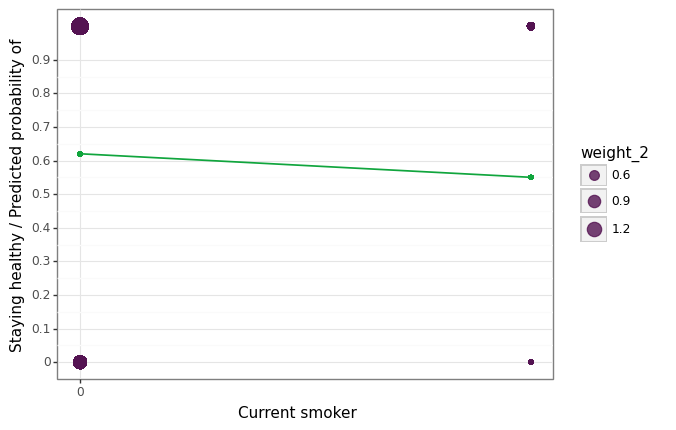

<ggplot: (291183971)>

In [37]:
g1 = (ggplot(data = share) 
 + geom_point(aes(x = 'smoking', y = 'pred1'), size = 1, color=color[1]) 
 + geom_line(aes(x = 'smoking', y = 'pred1'), colour=color[1],  size=0.7) 
 + geom_point(aes(x = 'smoking', y = 'stayshealthy', size='weight_2'), fill = color[2], color=color[2], alpha=0.8)
 + labs(x = "Current smoker",y = "Staying healthy / Predicted probability of ")
 +  coord_cartesian(xlim = [0, 1], ylim=[0,1]) 
 + scale_y_continuous(limits = [0,1], breaks = seq(0,1,0.1))
 + scale_x_continuous(limits = [0,1], breaks = seq(0,1,1))
 + theme_bw() 
)
g1

In [38]:
lpm2 = smf.ols('stayshealthy ~ smoking + ever_smoked', data=share).fit()

In [39]:
print(lpm2.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:           stayshealthy   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.665
Date:                Thu, 22 Oct 2020   Prob (F-statistic):            0.00350
Time:                        11:10:19   Log-Likelihood:                -2181.0
No. Observations:                3109   AIC:                             4368.
Df Residuals:                    3106   BIC:                             4386.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6154      0.012     50.204      

In [40]:
share['weight']=share.groupby(['eduyears','stayshealthy'])['smoking'].transform(len)/100

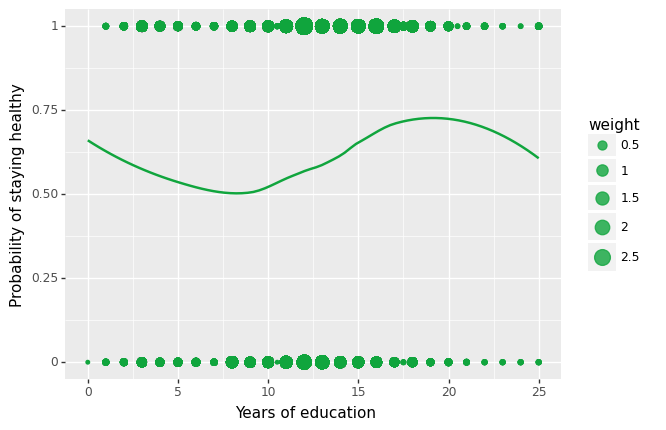

<ggplot: (-9223372036557621844)>

In [41]:
g2 = (ggplot(data = share) 
 + geom_point(aes(x = 'eduyears', y = 'stayshealthy',size='weight'), color=color[1],alpha=0.8) 
 + geom_smooth(aes(x = 'eduyears', y = 'stayshealthy'),method="loess",se=False, color=color[1]) 
 + labs(x = "Years of education",y = "Probability of staying healthy ")
# + coord_cartesian(xlim = [0, 1], ylim=[0,1]) 
# + scale_x_continuous(expand = [0.01,0.01], limits = [0,25], breaks = seq(0,25,4))
# + scale_y_continuous(expand = [0.01,0.01], limits = [0,1], breaks = seq(0,1,0.1))
# + theme_bw() 
)
g2

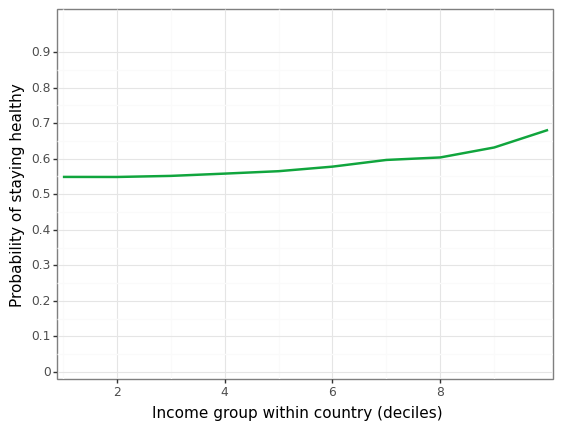

<ggplot: (-9223372036557432348)>

In [42]:
g2b = (ggplot(data = share) 
 + geom_smooth(aes(x = 'income10', y = 'stayshealthy'),method="loess",se=False, color=color[1]) 
 + labs(x = "Income group within country (deciles)",y = "Probability of staying healthy ")
 + scale_x_continuous(expand = [0.01,0.01], limits = [1,10], breaks = seq(0,10,2))
 + scale_y_continuous(expand = [0.01,0.01], limits = [0,1], breaks = seq(0,1,0.1))
 + theme_bw() 
)
g2b

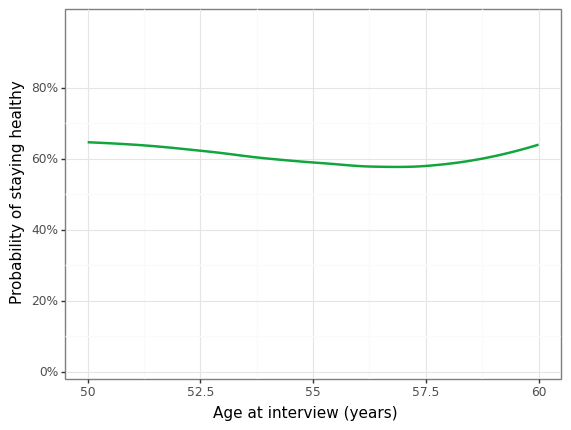

<ggplot: (298066138)>

In [43]:
g2c = (ggplot(data = share)
  + geom_smooth(aes(x='age', y='stayshealthy'), method="loess",se=False ,color=color[1])
  + scale_y_continuous(expand = [0.01,0.01],limits = [0,1], breaks = seq(0,1,0.2), labels =percent_format()) 
  + labs(x = "Age at interview (years)",y = "Probability of staying healthy") 
  + theme_bw() 
)
g2c

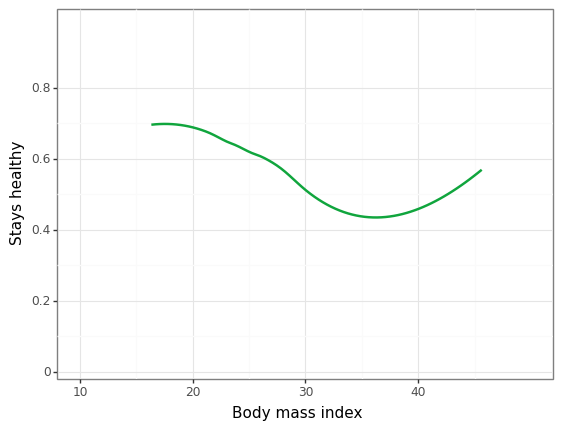

<ggplot: (297851803)>

In [44]:
g2d = (ggplot(data = share)
  + geom_smooth(aes(x='bmi', y='stayshealthy'), method="loess",se=False ,color=color[1])
  + scale_y_continuous(expand = [0.01,0.01],limits = [0,1], breaks = seq(0,1,0.2)) 
  + scale_x_continuous(limits = [10,50], breaks = seq(10,50, 10))
  + labs(x = "Body mass index",y = "Stays healthy")
  + theme_bw() 
)
g2d

In [45]:
#Part 3

In [46]:
share['country'] = share['country'].astype('category')

In [47]:
y,X = dmatrices("stayshealthy ~ smoking + ever_smoked + female + age + lspline(eduyears,[8,18]) + \
                 income10 + lspline(bmi,[35]) + exerc + country",share)

In [48]:
lpm3 = sm.OLS(y, X)
lpm3 = lpm3.fit()

In [49]:
print(lpm3.get_robustcov_results(cov_type='HC1').summary())

                            OLS Regression Results                            
Dep. Variable:           stayshealthy   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     17.32
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           4.57e-68
Time:                        11:10:23   Log-Likelihood:                -2018.4
No. Observations:                3109   AIC:                             4087.
Df Residuals:                    3084   BIC:                             4238.
Df Model:                          24                                         
Covariance Type:                  HC1                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [50]:
share['pred_lpm'] = lpm3.predict()

In [51]:
share['pred_lpm'].describe()

count    3109.000000
mean        0.604696
std         0.156665
min         0.036103
25%         0.500122
50%         0.607342
75%         0.713423
max         1.011026
Name: pred_lpm, dtype: float64

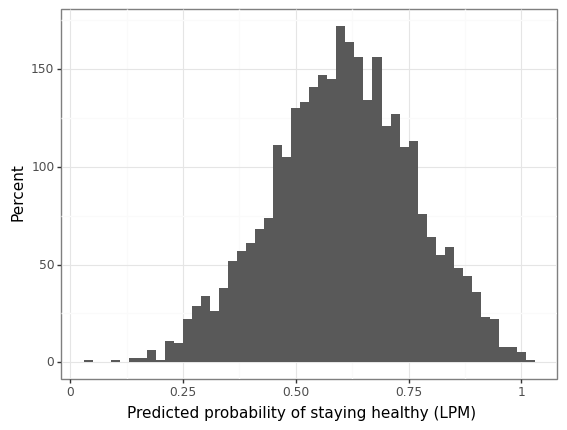

<ggplot: (298461490)>

In [52]:
g3 = (ggplot(data = share)
  + geom_histogram(aes(x='pred_lpm'),binwidth=0.02)
  + labs(x = "Predicted probability of staying healthy (LPM)",y = "Percent")
  #+ scale_y_continuous(expand = [0.00,0.0], limits = [0,0.07], breaks = seq(0, 0.07, 0.01)) 
 # + scale_x_continuous(expand = [0.001,0.01], limits = [0,1.1], breaks = seq(0,1.1, 0.2)) 
  + theme_bw() 
)
g3

In [53]:
share['pred_lpm'].head()

0    0.654021
1    0.696147
2    0.749901
3    0.703965
4    0.598621
Name: pred_lpm, dtype: float64

In [54]:
share['pred_lpm'].tail()

3104    0.524138
3105    0.622032
3106    0.517906
3107    0.508623
3108    0.522271
Name: pred_lpm, dtype: float64

In [55]:
share['pred_lpm'].values

array([0.6540205 , 0.69614673, 0.74990148, ..., 0.51790601, 0.50862266,
       0.52227106])

In [56]:
a = pd.qcut(share['pred_lpm'], 100, labels=False)

In [57]:
a

0       61
1       71
2       81
3       72
4       47
        ..
3104    30
3105    53
3106    28
3107    26
3108    29
Name: pred_lpm, Length: 3109, dtype: int64

In [ ]:
#cuts = 100
#share['q100_pred_lpm']=pd.qcut(share['pred_lpm'],q=cuts, labels=range(1, cuts+1))

In [ ]:
share.loc[share['q100_pred_lpm']==1,['smoking','ever_smoked','female','age','eduyears','income10','bmi','exerc']].describe() 

In [ ]:
share.loc[share['q100_pred_lpm']==100,['smoking','ever_smoked','female','age','eduyears','income10','bmi','exerc']].describe()

In [ ]:
#Part 4

In [ ]:
logit = sm.GLM(y,X, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))

In [ ]:
logit = sm.GLM(y,X, family=sm.families.Binomial(link=sm.genmod.families.links.logit()))
logit = logit.fit()

In [ ]:
logit.summary()

In [ ]:
share['pred_logit'] = logit.predict()

In [ ]:
share['pred_logit'].describe()

In [ ]:
logit = sm.Logit(y,X)

In [ ]:
type(logit)

In [ ]:
logit_result = logit.fit()

In [ ]:
logit_result.summary()

In [ ]:
logit_margef_results = logit_result.get_margeff()

In [ ]:
logit_margef_results.summary()

In [ ]:
probit = sm.Probit(y,X)

In [ ]:
probit_result = probit.fit()

In [ ]:
probit_result.summary()

In [ ]:
share['pred_probit']=probit_result.predict()

In [ ]:
share['pred_probit'].describe()

In [ ]:
probit_margef_results = probit_result.get_margeff()

In [ ]:
probit_margef_results.summary()

In [ ]:
df_plot = pd.melt(share[['pred_lpm','pred_logit','pred_probit']].rename(
        columns={'pred_logit':'Logit','pred_probit':'Probit'}),
        value_vars=['Logit','Probit'],id_vars=['pred_lpm'])

In [ ]:
df_plot

In [ ]:
g5 = (ggplot(data = df_plot) 
  + geom_point(aes(x='pred_lpm', y='value',color='variable'), size=0.5)
  + geom_abline(intercept = 0, slope = 1)    
  #+ geom_line(aes(x='pred_lpm',y='pred_lpm'),    color=color[1], size=0.4)    
  + labs(x = "Predicted probability of staying healthy (LPM)", y="Predicted probability")
  + scale_y_continuous(expand = [0.00,0.0], limits = [0,1], breaks = seq(0,1,0.1)) 
  + scale_x_continuous(expand = [0.00,0.0], limits = [0,1], breaks = seq(0,1,0.1))
  + scale_color_manual(name = "", values=[color[3],color[2], color[1]])     
  + theme_bw()    
  #+ theme_bw()
  #+ theme_bg()+
)
g5

In [ ]:
#Part 5 goodness of fit

In [ ]:
lpmbase = smf.ols('stayshealthy ~ smoking', data=share).fit()

In [ ]:
share['pred_lpmbase']=lpmbase.predict()

In [ ]:
share['stayshealthy']

In [ ]:
share[share['stayshealthy']==1]

In [ ]:
g7a =(ggplot(data = share) 
 + geom_histogram(share[share['stayshealthy']==1],aes(x='pred_lpmbase',fill = 'stayshealthy',y = 'stat(count/sum(count)))*100'),binwidth = 0.05, alpha=1, color=color[1])
 + geom_histogram(share[share['stayshealthy']==0],aes(x='pred_lpmbase',fill = 'stayshealthy',y = 'stat(count/sum(count)))*100'),binwidth = 0.05, alpha=0, color=color[2])
 + ylab("Percent") 
 + xlab("Fitted values") 
 + scale_x_continuous(expand=[0.01,0.01] ,limits = [0,1], breaks = seq(0,1,0.2)) 
 + scale_y_continuous(expand=[0.00,0.00] ,limits = [0,80], breaks = seq(0,80,20)) 
 + theme_bw() 
)
g7a

In [ ]:
g7b =(ggplot(data = share) 
 + geom_histogram(share[share['stayshealthy']==1],aes(x='pred_lpm',fill = 'stayshealthy',y = 'stat(count/sum(count)))*100'),binwidth = 0.05, alpha=1, color=color[1])
 + geom_histogram(share[share['stayshealthy']==0],aes(x='pred_lpm',fill = 'stayshealthy',y = 'stat(count/sum(count)))*100'),binwidth = 0.05, alpha=0, color=color[2])
 + ylab("Percent") 
 + xlab("Fitted values") 
 + scale_x_continuous(expand=[0.01,0.01] ,limits = [0,1], breaks = seq(0,1,0.2)) 
 + scale_y_continuous(expand=[0.00,0.00] ,limits = [0,20], breaks = seq(0,20,4)) 
 + theme_bw() 
)
g7b

In [ ]:
share.groupby('stayshealthy')['pred_lpmbase','pred_lpm','pred_logit','pred_probit'].mean()

In [ ]:
share.groupby('stayshealthy')['pred_lpmbase','pred_lpm','pred_logit','pred_probit'].median()

In [ ]:
##Create calibration plot

In [ ]:
## Part 7

In [ ]:
df = share[['pred_lpmbase','pred_lpm','pred_logit','pred_probit']].copy()

In [ ]:
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if df.iloc[i,j]>0.5:
            df.iloc[i,j]=1
        else:
            df.iloc[i,j]=0
            

In [ ]:
pd.crosstab(df.iloc[:,0],share['stayshealthy'],normalize='all')

In [ ]:
for j in range(df.shape[1]):
    print(pd.crosstab(df.iloc[:,j],share['stayshealthy'],normalize='all'))
    print(pd.crosstab(df.iloc[:,j],share['stayshealthy'],normalize='columns'))

In [ ]:
data_out

In [ ]:
#Part 8

In [ ]:
share = pd.read_csv(os.path.join(data_out,"ch11_share.csv"))

In [ ]:
share['country'] = share['country'].astype('category')

In [ ]:
y,X = dmatrices("stayshealthy ~ smoking + ever_smoked + female + age + lspline(eduyears,[8,18]) + \
                 income10 + lspline(bmi,[35]) + exerc + country",share)

In [ ]:
logit = sm.Logit(y,X).fit()

In [ ]:
logit.summary()

In [ ]:
share['bx_logit'] = np.asarray(X).dot(logit.params)

In [ ]:
share['illustr_logit'] = logistic.cdf(share['bx_logit'])

In [ ]:
probit = sm.Probit(y,X).fit()

In [ ]:
probit.summary()

In [ ]:
share['bx_probit'] = np.asarray(X).dot(probit.params)

In [ ]:
share['illustr_probit'] = norm.cdf(share['bx_probit'])

In [ ]:
share_plot = pd.melt(share[['bx_logit','illustr_logit','illustr_probit']],id_vars=['bx_logit'],value_vars=['illustr_logit','illustr_probit'])

In [ ]:
share_plot.head()

In [ ]:
share_plot['variable']=share_plot['variable'].replace('illustr_logit', 'Logit').replace('illustr_probit', 'Probit')

In [ ]:
g4 =(ggplot(data = share_plot) 
 + geom_line(aes(x='bx_logit',y ='value',color='variable'),size=0.7)
 + ylab("Probability") 
 + xlab("z values") 
 + scale_y_continuous(expand=[0.00,0.00] ,limits = [0,1], breaks = seq(0,1,0.2)) 
 + theme_bw() 
)
g4